In [1]:
nombre = "Madrigal Urencio Ricardo \n"

In [2]:
dir_hdfs = "hdfs://namenode:9000/tmp/amd/locatellimpio"

In [3]:
df = spark.read.csv(dir_hdfs, header = True, inferSchema = True)

print(nombre)
df.printSchema()

Madrigal Urencio Ricardo 

root
 |-- fecha_solicitud: date (nullable = true)
 |-- hora_solicitud: timestamp (nullable = true)
 |-- tema_solicitud: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- edad: double (nullable = true)
 |-- estatus: string (nullable = true)
 |-- alcaldia: string (nullable = true)
 |-- colonia_datos: string (nullable = true)
 |-- latitud: double (nullable = true)
 |-- longitud: double (nullable = true)
 |-- codigo_postal_solicitud: string (nullable = true)
 |-- d_codigo: integer (nullable = true)
 |-- D_mnpio: string (nullable = true)



In [4]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+



In [5]:
df.createOrReplaceTempView("locatel")
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |  locatel|       true|
+---------+---------+-----------+



In [6]:
print(nombre)
spark.sql("describe locatel").show()

Madrigal Urencio Ricardo 

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|     fecha_solicitud|     date|   NULL|
|      hora_solicitud|timestamp|   NULL|
|      tema_solicitud|   string|   NULL|
|                sexo|   string|   NULL|
|                edad|   double|   NULL|
|             estatus|   string|   NULL|
|            alcaldia|   string|   NULL|
|       colonia_datos|   string|   NULL|
|             latitud|   double|   NULL|
|            longitud|   double|   NULL|
|codigo_postal_sol...|   string|   NULL|
|            d_codigo|      int|   NULL|
|             D_mnpio|   string|   NULL|
+--------------------+---------+-------+



In [7]:
spark.sql("select fecha_solicitud, edad, alcaldia from locatel").show(truncate = False)

+---------------+----+--------+
|fecha_solicitud|edad|alcaldia|
+---------------+----+--------+
|2021-01-03     |NULL|NA      |
|2021-01-10     |NULL|NA      |
|2021-01-16     |NULL|NA      |
|2021-01-20     |NULL|NA      |
|2021-01-24     |NULL|NA      |
|2021-01-28     |NULL|NA      |
|2021-02-05     |NULL|NA      |
|2021-02-08     |NULL|NA      |
|2021-02-08     |NULL|NA      |
|2021-02-09     |NULL|NA      |
|2021-02-14     |NULL|NA      |
|2021-02-15     |NULL|NA      |
|2021-02-16     |NULL|NA      |
|2021-02-18     |NULL|NA      |
|2021-02-19     |NULL|NA      |
|2021-02-23     |NULL|NA      |
|2021-03-01     |NULL|NA      |
|2021-03-10     |NULL|NA      |
|2021-03-15     |NULL|NA      |
|2021-03-17     |NULL|NA      |
+---------------+----+--------+
only showing top 20 rows



In [8]:
sqlstr = """select fecha_solicitud, edad, alcaldia
from locatel
where edad is not null
"""
spark.sql(sqlstr).show(truncate=False)

+---------------+----+-----------------+
|fecha_solicitud|edad|alcaldia         |
+---------------+----+-----------------+
|2021-02-14     |51.0|NA               |
|2021-01-01     |51.0|Tlalpan          |
|2021-01-03     |46.0|NA               |
|2021-01-04     |38.0|NA               |
|2021-01-04     |61.0|Tlalpan          |
|2021-01-05     |29.0|NA               |
|2021-01-06     |69.0|Cuauhtémoc       |
|2021-01-08     |58.0|NA               |
|2021-01-08     |57.0|NA               |
|2021-01-08     |35.0|NA               |
|2021-01-09     |70.0|Gustavo A. Madero|
|2021-01-09     |28.0|Monterrey        |
|2021-01-10     |80.0|NA               |
|2021-01-10     |39.0|Azcapotzalco     |
|2021-01-10     |40.0|Coyoacán         |
|2021-01-11     |53.0|Cuauhtémoc       |
|2021-01-11     |27.0|Azcapotzalco     |
|2021-01-11     |32.0|NA               |
|2021-01-12     |43.0|Tlalpan          |
|2021-01-12     |64.0|Cuauhtémoc       |
+---------------+----+-----------------+
only showing top

In [9]:
sqlstr = """select count(*) nr from locatel"""
spark.sql(sqlstr).show(truncate=False)

+-------+
|nr     |
+-------+
|2323089|
+-------+



In [10]:
#Número de registros por sexo

sqlstr = """select sexo, count(*) nr 
from locatel
group by sexo
order by sexo
"""
spark.sql(sqlstr).show(truncate=False)

+---------------+------+
|sexo           |nr    |
+---------------+------+
|FEMENINO       |829463|
|MASCULINO      |572469|
|NA             |566833|
|NO ESPECIFICADO|354324|
+---------------+------+



In [11]:
#Número de registros por edad
campo = "edad"

sqlstr = f"""select {campo}, count(*) nr 
from locatel
group by {campo}
order by {campo} desc
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+-------+---+
|edad   |nr |
+-------+---+
|16090.0|1  |
|100.0  |16 |
|99.0   |19 |
|98.0   |14 |
|97.0   |23 |
|96.0   |26 |
|95.0   |36 |
|94.0   |51 |
|93.0   |77 |
|92.0   |89 |
+-------+---+
only showing top 10 rows



In [12]:
#Número de registros por tema
campo = "tema_solicitud"

sqlstr = f"""select {campo}, count(*) nr 
from locatel
group by {campo}
order by nr desc 
limit 5
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)


Madrigal Urencio Ricardo 

+-------------------+------+
|tema_solicitud     |nr    |
+-------------------+------+
|OTRO               |303078|
|ALUMBRADO          |259590|
|PODA / RETIRO ARBOL|214579|
|FALTA DE AGUA      |205785|
|FUGA DE AGUA       |109632|
+-------------------+------+



In [13]:
#Edad por campo
campo = "tema_solicitud"

sqlstr = f"""select {campo}, round(avg(edad), 2) edad_prom,
max(edad) edad_max, min(edad) edad_min, count(*) nr
from locatel
group by {campo}
order by {campo}
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+------------------------------------+---------+--------+--------+------+
|tema_solicitud                      |edad_prom|edad_max|edad_min|nr    |
+------------------------------------+---------+--------+--------+------+
|AGUA POTABLE Y SERVICIOS HIDRÁULICOS|42.73    |96.0    |0.0     |17573 |
|ALARMAS VECINALES                   |44.42    |87.0    |0.0     |1410  |
|ALERTA SISMICA                      |40.62    |99.0    |0.0     |44182 |
|ALUMBRADO                           |42.76    |100.0   |0.0     |259590|
|ANUNCIOS                            |38.95    |90.0    |0.0     |848   |
|APOYO SERVICIOS FUNERARIOS          |43.41    |73.0    |0.0     |164   |
|ASESORIAS                           |39.17    |97.0    |0.0     |7489  |
|ASESORÍA DE TERCEROS ACREDITADOS    |40.55    |62.0    |1.0     |407   |
|ASESORÍA JURÍDICA                   |39.8     |95.0    |0.0     |3522  |
|ASISTENCIA SOCIAL                   |41.41    |98.0    |0.0     |17254 |
+----------

In [14]:
#Edad por campo
campo = "sexo"

sqlstr = f"""select {campo}, round(avg(edad), 2) edad_prom,
max(edad) edad_max, min(edad) edad_min, count(*) nr
from locatel
group by {campo}
order by {campo}
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+---------------+---------+--------+--------+------+
|sexo           |edad_prom|edad_max|edad_min|nr    |
+---------------+---------+--------+--------+------+
|FEMENINO       |36.33    |16090.0 |0.0     |829463|
|MASCULINO      |43.39    |100.0   |0.0     |572469|
|NA             |NULL     |NULL    |NULL    |566833|
|NO ESPECIFICADO|46.36    |100.0   |0.0     |354324|
+---------------+---------+--------+--------+------+



In [15]:
#Numero de registros por hora
campo = "hora"

sqlstr = f"""select HOUR(hora_solicitud) hora, count(*) nr
from locatel
group by HOUR(hora_solicitud)
order by 1
"""
print(nombre)
spark.sql(sqlstr).show(24, truncate=False)

Madrigal Urencio Ricardo 

+----+------+
|hora|nr    |
+----+------+
|0   |23063 |
|1   |12930 |
|2   |6272  |
|3   |3304  |
|4   |2564  |
|5   |3839  |
|6   |10170 |
|7   |26782 |
|8   |62029 |
|9   |141117|
|10  |209542|
|11  |255883|
|12  |273569|
|13  |264280|
|14  |196468|
|15  |147518|
|16  |129561|
|17  |120924|
|18  |104890|
|19  |91447 |
|20  |77633 |
|21  |68407 |
|22  |52996 |
|23  |37901 |
+----+------+



Madrigal Urencio Ricardo 



Text(0.5, 1.0, 'Numero de registros por hora')

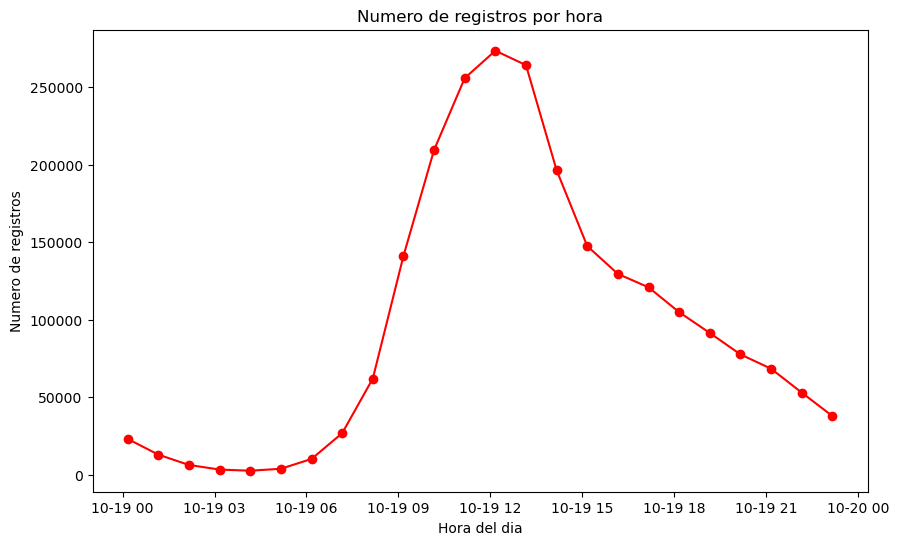

In [16]:
import matplotlib.pyplot as plt
#Numero de registros por hora
sqlstr = f"""
    SELECT hora_solicitud hora, COUNT(*) nr
    FROM locatel
    GROUP BY hora_solicitud
    ORDER BY 1
"""
print(nombre)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(10,6))
#plt.bar(dfh['hora'], dfh['nr'])
plt.plot(dfh['hora'], dfh['nr'], marker='o', linestyle='-', color='r')

plt.xlabel('Hora del dia')
plt.ylabel('Numero de registros')
plt.title('Numero de registros por hora')

In [17]:
spark.sql("SELECT hora_solicitud FROM locatel").show(10, truncate = False)

+-------------------+
|hora_solicitud     |
+-------------------+
|2024-10-19 00:10:00|
|2024-10-19 12:10:00|
|2024-10-19 19:10:00|
|2024-10-19 15:10:00|
|2024-10-19 06:10:00|
|2024-10-19 16:10:00|
|2024-10-19 12:10:00|
|2024-10-19 14:10:00|
|2024-10-19 17:10:00|
|2024-10-19 19:10:00|
+-------------------+
only showing top 10 rows



Madrigal Urencio Ricardo 



Text(0.5, 1.0, 'NUMERO DE REGISTROS POR HORA')

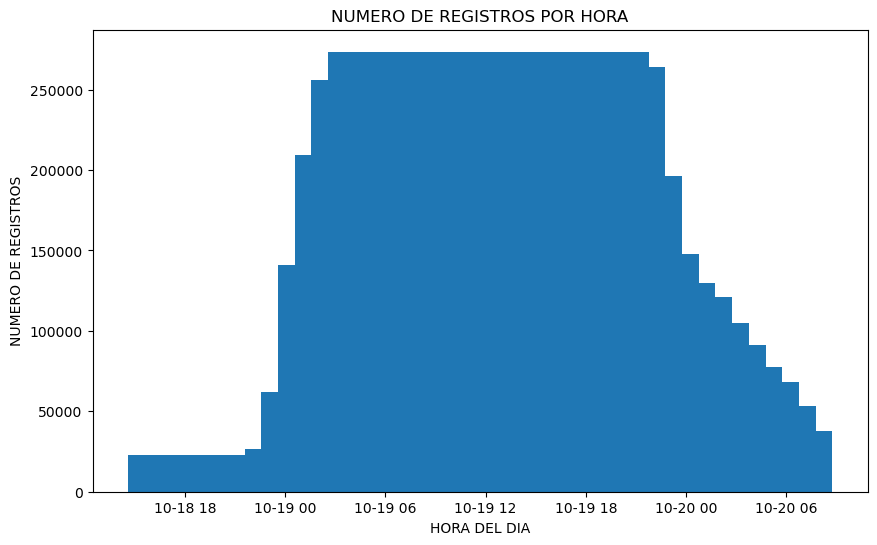

In [18]:
import matplotlib.pyplot as plt
#Numero de registros por hora
sqlstr = f"""
    SELECT hora_solicitud hora, COUNT(*) nr
    FROM locatel
    GROUP BY hora_solicitud
    ORDER BY 1
"""
print(nombre)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(10,6))
plt.bar(dfh['hora'], dfh['nr'])
#plt.plot(dfh['hora'], dfh['nr'], marker='o', linestyle='-', color='r')

plt.xlabel('HORA DEL DIA')
plt.ylabel('NUMERO DE REGISTROS')
plt.title('NUMERO DE REGISTROS POR HORA')

In [19]:
#Numero de registros por hora
sqlstr = f"""
    SELECT YEAR(fecha_solicitud) anio, COUNT(*) nr
    FROM locatel
    GROUP BY anio
    ORDER BY 1
"""
print(nombre)
dfh = spark.sql(sqlstr).show(30, truncate=False)

Madrigal Urencio Ricardo 

+----+------+
|anio|nr    |
+----+------+
|2019|215262|
|2020|363065|
|2021|561313|
|2022|500940|
|2023|569362|
|2024|113147|
+----+------+



Madrigal Urencio Ricardo 



Text(0.5, 1.0, 'NUMERO DE REGISTROS POR AÑO')

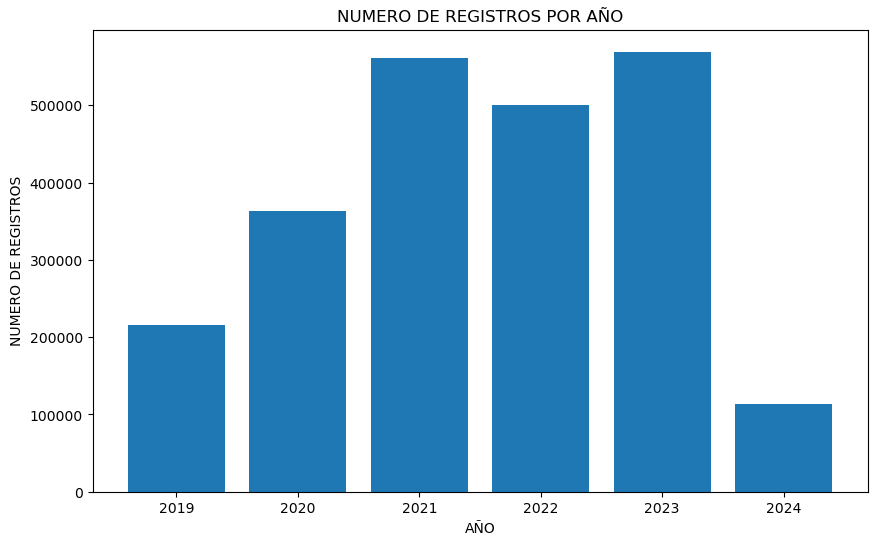

In [20]:
#Numero de registros por hora
sqlstr = f"""
    SELECT YEAR(fecha_solicitud) anio, COUNT(*) nr
    FROM locatel
    GROUP BY anio
    ORDER BY 1
"""
print(nombre)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(10,6))
plt.bar(dfh['anio'], dfh['nr'])

plt.xlabel('AÑO')
plt.ylabel('NUMERO DE REGISTROS')
plt.title('NUMERO DE REGISTROS POR AÑO')

In [21]:
#Numero de registros por hora
sqlstr = f"""
    SELECT YEAR(fecha_solicitud) anio, sexo, COUNT(*) nr
    FROM locatel
    GROUP BY anio, sexo
    ORDER BY 1
"""
print(nombre)
dfh = spark.sql(sqlstr).show(100, truncate=False)

Madrigal Urencio Ricardo 

+----+---------------+------+
|anio|sexo           |nr    |
+----+---------------+------+
|2019|MASCULINO      |76544 |
|2019|NO ESPECIFICADO|29729 |
|2019|FEMENINO       |108989|
|2020|NO ESPECIFICADO|39148 |
|2020|FEMENINO       |199272|
|2020|MASCULINO      |124645|
|2021|NA             |40412 |
|2021|FEMENINO       |278166|
|2021|NO ESPECIFICADO|59198 |
|2021|MASCULINO      |183537|
|2022|FEMENINO       |73750 |
|2022|MASCULINO      |57265 |
|2022|NA             |304896|
|2022|NO ESPECIFICADO|65029 |
|2023|MASCULINO      |95546 |
|2023|NA             |218480|
|2023|NO ESPECIFICADO|137300|
|2023|FEMENINO       |118036|
|2024|FEMENINO       |51250 |
|2024|NA             |3045  |
|2024|MASCULINO      |34932 |
|2024|NO ESPECIFICADO|23920 |
+----+---------------+------+



In [22]:
#Numero de registros por hora
sqlstr = f"""
    SELECT anio,
    SUM(CASE WHEN sexo='FEMENINO' THEN nr ELSE 0 END) AS FEMENINO,
    SUM(CASE WHEN sexo='MASCULINO' THEN nr ELSE 0 END) AS MASCULINO,
    SUM(CASE WHEN sexo IN('NA', 'NO ESPECIFICADO') THEN nr ELSE 0 END) AS NO_ESPECIFICADO
    FROM (    
        SELECT YEAR(fecha_solicitud) anio, sexo, COUNT(*) nr
        FROM locatel
        GROUP BY anio, sexo
    ) d
    GROUP BY anio
    ORDER BY 1
"""
print(nombre)
dfh = spark.sql(sqlstr).show(100, truncate=False)

Madrigal Urencio Ricardo 

+----+--------+---------+---------------+
|anio|FEMENINO|MASCULINO|NO_ESPECIFICADO|
+----+--------+---------+---------------+
|2019|108989  |76544    |29729          |
|2020|199272  |124645   |39148          |
|2021|278166  |183537   |99610          |
|2022|73750   |57265    |369925         |
|2023|118036  |95546    |355780         |
|2024|51250   |34932    |26965          |
+----+--------+---------+---------------+



Madrigal Urencio Ricardo 



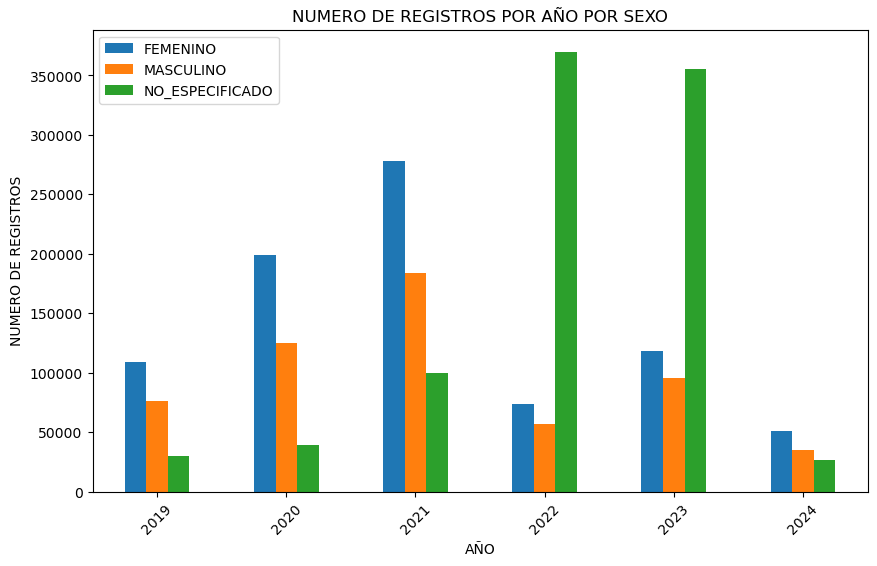

In [23]:
#Numero de registros por hora
sqlstr = f"""
    SELECT anio,
    SUM(CASE WHEN sexo='FEMENINO' THEN nr ELSE 0 END) AS FEMENINO,
    SUM(CASE WHEN sexo='MASCULINO' THEN nr ELSE 0 END) AS MASCULINO,
    SUM(CASE WHEN sexo IN('NA', 'NO ESPECIFICADO') THEN nr ELSE 0 END) AS NO_ESPECIFICADO
    FROM (    
        SELECT YEAR(fecha_solicitud) anio, sexo, COUNT(*) nr
        FROM locatel
        GROUP BY anio, sexo
    ) d
    GROUP BY anio
    ORDER BY 1
"""
print(nombre)
dfh = spark.sql(sqlstr).toPandas()\
    .set_index('anio')[['FEMENINO', 'MASCULINO', 'NO_ESPECIFICADO']]\
    .plot(kind='bar', stacked=False, figsize=(10,6))

plt.xlabel('AÑO')
plt.ylabel('NUMERO DE REGISTROS')
plt.title('NUMERO DE REGISTROS POR AÑO POR SEXO') 
plt.xticks(rotation=45)

plt.show()

In [24]:
#Numero de registros por hora
sqlstr = f"""
    SELECT anio,
    SUM(CASE WHEN sexo='FEMENINO' THEN nr ELSE 0 END) AS FEMENINO,
    SUM(CASE WHEN sexo='MASCULINO' THEN nr ELSE 0 END) AS MASCULINO,
    SUM(CASE WHEN sexo IN('NA', 'NO ESPECIFICADO') THEN nr ELSE 0 END) AS NO_ESPECIFICADO
    FROM (    
        SELECT YEAR(fecha_solicitud) anio, sexo, COUNT(*) nr
        FROM locatel
        GROUP BY anio, sexo
    ) d
    GROUP BY anio
    ORDER BY 1
"""
print(nombre)
spark.sql(sqlstr)\
    .write.mode("append")\
    .save("hdfs://namenode:9000/tmp/amd/locatelanio")


Madrigal Urencio Ricardo 



In [25]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
 
schema = StructType([
    StructField("d_codigo", StringType(), True),
    StructField("d_asenta", StringType(), True),
    StructField("d_tipo_asenta", StringType(), True),
    StructField("D_mnpio", StringType(), True),
    StructField("d_estado", StringType(), True),
    StructField("d_ciudad", StringType(), True),
    StructField("d_CP", StringType(), True),
    StructField("c_estado", StringType(), True),
    StructField("c_oficina", StringType(), True),
    StructField("c_CP", StringType(), True),
    StructField("c_tipo_asenta", StringType(), True),
    StructField("c_mnpio", StringType(), True),
    StructField("id_asenta_cpcons", StringType(), True),
    StructField("d_zona", StringType(), True),
    StructField("c_cve_ciudad", StringType(), True)
])

In [26]:
sepomex_df = spark.read\
            .option("header","true")\
            .option("delimiter", "|")\
            .option("skipRows", "1")\
            .option("encoding", "UTF-8")\
            .schema(schema)\
            .csv("hdfs://namenode:9000/tmp/amd/sepomex/")

sepomex_df.count()

155922

In [27]:
sepomex_df.printSchema()

root
 |-- d_codigo: string (nullable = true)
 |-- d_asenta: string (nullable = true)
 |-- d_tipo_asenta: string (nullable = true)
 |-- D_mnpio: string (nullable = true)
 |-- d_estado: string (nullable = true)
 |-- d_ciudad: string (nullable = true)
 |-- d_CP: string (nullable = true)
 |-- c_estado: string (nullable = true)
 |-- c_oficina: string (nullable = true)
 |-- c_CP: string (nullable = true)
 |-- c_tipo_asenta: string (nullable = true)
 |-- c_mnpio: string (nullable = true)
 |-- id_asenta_cpcons: string (nullable = true)
 |-- d_zona: string (nullable = true)
 |-- c_cve_ciudad: string (nullable = true)



In [28]:
sepomex_df.select(['d_codigo', 'D_mnpio', 'd_estado', 'd_ciudad']).distinct().count()

32199

In [29]:
sepomex_df.select(['d_codigo', 'D_mnpio', 'd_estado', 'd_ciudad']).distinct().show(50, truncate = False)

+--------+----------------------+--------------------+-------------------------+
|d_codigo|D_mnpio               |d_estado            |d_ciudad                 |
+--------+----------------------+--------------------+-------------------------+
|04120   |Coyoacán              |Ciudad de México    |Ciudad de México         |
|11480   |Miguel Hidalgo        |Ciudad de México    |Ciudad de México         |
|20416   |Rincón de Romos       |Aguascalientes      |Rincón de Romos          |
|22110   |Tijuana               |Baja California     |Tijuana                  |
|22524   |Tijuana               |Baja California     |Tijuana                  |
|23095   |La Paz                |Baja California Sur |La Paz                   |
|25034   |Saltillo              |Coahuila de Zaragoza|Saltillo                 |
|25734   |Monclova              |Coahuila de Zaragoza|Monclova                 |
|27217   |Torreón               |Coahuila de Zaragoza|Torreón                  |
|31214   |Chihuahua         

In [30]:
sepomex_df.select(['d_codigo', 'D_mnpio', 'd_estado', 'd_ciudad']).distinct().createOrReplaceTempView("sepomex")

In [31]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |  locatel|       true|
|         |  sepomex|       true|
+---------+---------+-----------+



In [32]:
spark.sql("describe sepomex").show()

+--------+---------+-------+
|col_name|data_type|comment|
+--------+---------+-------+
|d_codigo|   string|   NULL|
| D_mnpio|   string|   NULL|
|d_estado|   string|   NULL|
|d_ciudad|   string|   NULL|
+--------+---------+-------+



In [33]:
spark.sql("select count(*) from sepomex").show()

+--------+
|count(1)|
+--------+
|   32199|
+--------+



In [34]:
spark.sql("select * from sepomex").show()

+--------+-------------------+--------------------+-------------------+
|d_codigo|            D_mnpio|            d_estado|           d_ciudad|
+--------+-------------------+--------------------+-------------------+
|   04120|           Coyoacán|    Ciudad de México|   Ciudad de México|
|   11480|     Miguel Hidalgo|    Ciudad de México|   Ciudad de México|
|   20416|    Rincón de Romos|      Aguascalientes|    Rincón de Romos|
|   22110|            Tijuana|     Baja California|            Tijuana|
|   22524|            Tijuana|     Baja California|            Tijuana|
|   23095|             La Paz| Baja California Sur|             La Paz|
|   25034|           Saltillo|Coahuila de Zaragoza|           Saltillo|
|   25734|           Monclova|Coahuila de Zaragoza|           Monclova|
|   27217|            Torreón|Coahuila de Zaragoza|            Torreón|
|   31214|          Chihuahua|           Chihuahua|          Chihuahua|
|   31220|          Chihuahua|           Chihuahua|          Chi

In [35]:
#Ver el numero de registros por estado
sqlstr = """ select d_estado as estado, count(*) nr
from sepomex
group by d_estado
order by 1

"""

spark.sql(sqlstr).show(40, truncate = False)

+-------------------------------+----+
|estado                         |nr  |
+-------------------------------+----+
|Aguascalientes                 |373 |
|Baja California                |490 |
|Baja California Sur            |289 |
|Campeche                       |266 |
|Chiapas                        |1149|
|Chihuahua                      |1101|
|Ciudad de México               |1110|
|Coahuila de Zaragoza           |1063|
|Colima                         |235 |
|Durango                        |1054|
|Guanajuato                     |1381|
|Guerrero                       |1355|
|Hidalgo                        |1116|
|Jalisco                        |1994|
|Michoacán de Ocampo            |1964|
|Morelos                        |418 |
|México                         |2319|
|Nayarit                        |444 |
|Nuevo León                     |1101|
|Oaxaca                         |1851|
|Puebla                         |1572|
|Querétaro                      |517 |
|Quintana Roo            

In [36]:
sqlstr = """select count(*) from locatel"""

spark.sql(sqlstr).show(40, truncate = False)

+--------+
|count(1)|
+--------+
|2323089 |
+--------+



In [37]:

sqlstr = """ select * 
from locatel l 
join sepomex s
on(l.d_codigo = s.d_codigo)
order by 1

"""

spark.sql(sqlstr).show(40, truncate = False)

+---------------+-------------------+---------------------------------------+---------------+----+--------+-------------------+-----------------------------------+---------------+----------------+-----------------------+--------+-------------------+--------+-------------------+----------------+----------------+
|fecha_solicitud|hora_solicitud     |tema_solicitud                         |sexo           |edad|estatus |alcaldia           |colonia_datos                      |latitud        |longitud        |codigo_postal_solicitud|d_codigo|D_mnpio            |d_codigo|D_mnpio            |d_estado        |d_ciudad        |
+---------------+-------------------+---------------------------------------+---------------+----+--------+-------------------+-----------------------------------+---------------+----------------+-----------------------+--------+-------------------+--------+-------------------+----------------+----------------+
|2019-06-02     |2024-10-19 16:10:00|ALUMBRADO               

In [38]:
sqlstr = """select * 
from locatel l 
join sepomex s
on(l.d_codigo = s.d_codigo)
order by 1
"""

spark.sql(sqlstr).show(40, truncate = False)

+---------------+-------------------+---------------------------------------+---------------+----+--------+-------------------+-----------------------------------+---------------+----------------+-----------------------+--------+-------------------+--------+-------------------+----------------+----------------+
|fecha_solicitud|hora_solicitud     |tema_solicitud                         |sexo           |edad|estatus |alcaldia           |colonia_datos                      |latitud        |longitud        |codigo_postal_solicitud|d_codigo|D_mnpio            |d_codigo|D_mnpio            |d_estado        |d_ciudad        |
+---------------+-------------------+---------------------------------------+---------------+----+--------+-------------------+-----------------------------------+---------------+----------------+-----------------------+--------+-------------------+--------+-------------------+----------------+----------------+
|2019-06-02     |2024-10-19 16:10:00|ALUMBRADO               

In [39]:
sqlstr = """select count(*) 
from locatel l 
join sepomex s
on(l.d_codigo = s.d_codigo)
order by 1
"""

spark.sql(sqlstr).show(40, truncate = False)

+--------+
|count(1)|
+--------+
|2025990 |
+--------+



In [40]:
sqlstr = """select count(*) 
from locatel l 
left join sepomex s
on(l.d_codigo = s.d_codigo)
order by 1
"""

spark.sql(sqlstr).show(40, truncate = False)

+--------+
|count(1)|
+--------+
|2323192 |
+--------+



In [41]:
sqlstr = """select count(*) 
from locatel l 
left join sepomex s
on(l.d_codigo = s.d_codigo)
where s.d_codigo is null
order by 1
"""

spark.sql(sqlstr).show(40, truncate = False)

+--------+
|count(1)|
+--------+
|297202  |
+--------+



In [42]:
sqlstr = """select fecha_solicitud, tema_solicitud, l.d_codigo, s.d_codigo, s.d_ciudad
from locatel l 
left join sepomex s
on(l.d_codigo = s.d_codigo)
where s.d_codigo is null
order by 1
"""

spark.sql(sqlstr).show(10, truncate = False)

+---------------+----------------------------------------+--------+--------+--------+
|fecha_solicitud|tema_solicitud                          |d_codigo|d_codigo|d_ciudad|
+---------------+----------------------------------------+--------+--------+--------+
|2019-06-01     |PODA / RETIRO ARBOL                     |NULL    |NULL    |NULL    |
|2019-06-02     |MANTENIMIENTO DE COLADERA / ALCANTARILLA|NULL    |NULL    |NULL    |
|2019-06-02     |WIFI GRATIS                             |NULL    |NULL    |NULL    |
|2019-06-02     |MEDIO AMBIENTE                          |NULL    |NULL    |NULL    |
|2019-06-02     |MEDIO AMBIENTE                          |NULL    |NULL    |NULL    |
|2019-06-02     |INFORMACIÓN SOBRE TRÁMITES              |NULL    |NULL    |NULL    |
|2019-06-02     |MANTENIMIENTO VÍA PÚBLICA               |NULL    |NULL    |NULL    |
|2019-06-02     |DEPORTE                                 |NULL    |NULL    |NULL    |
|2019-06-02     |MANTENIMIENTO DE COLADERA / ALCANTARI

In [43]:
sqlstr = """select fecha_solicitud, tema_solicitud, l.d_codigo, s.d_codigo, s.d_ciudad
from locatel l 
join sepomex s
on(l.d_codigo = s.d_codigo)
order by 1
"""

spark.sql(sqlstr).show(10, truncate = False)

+---------------+------------------------------------+--------+--------+----------------+
|fecha_solicitud|tema_solicitud                      |d_codigo|d_codigo|d_ciudad        |
+---------------+------------------------------------+--------+--------+----------------+
|2019-06-02     |BACHEO                              |7300    |07300   |Ciudad de México|
|2019-06-02     |MANTENIMIENTO DRENAJE               |4369    |04369   |Ciudad de México|
|2019-06-02     |MEDIO AMBIENTE                      |3810    |03810   |Ciudad de México|
|2019-06-02     |VEHÍCULO ABANDONADO / CHATARRIZACIÓN|6220    |06220   |Ciudad de México|
|2019-06-02     |FUGA DE AGUA                        |14350   |14350   |Ciudad de México|
|2019-06-02     |FUGA DE AGUA                        |4950    |04950   |Ciudad de México|
|2019-06-02     |FUGA DE AGUA                        |4950    |04950   |Ciudad de México|
|2019-06-02     |FUGA DE AGUA                        |4950    |04950   |Ciudad de México|
|2019-06-0

In [44]:
sqlstr = """select fecha_solicitud, tema_solicitud, l.d_codigo, s.d_codigo, s.d_ciudad
from locatel l 
right join sepomex s on(l.d_codigo = s.d_codigo)
order by 1
"""

spark.sql(sqlstr).show(10, truncate = False)

+---------------+--------------+--------+--------+--------------+
|fecha_solicitud|tema_solicitud|d_codigo|d_codigo|d_ciudad      |
+---------------+--------------+--------+--------+--------------+
|NULL           |NULL          |NULL    |20040   |Aguascalientes|
|NULL           |NULL          |NULL    |20149   |Aguascalientes|
|NULL           |NULL          |NULL    |20049   |Aguascalientes|
|NULL           |NULL          |NULL    |20369   |NULL          |
|NULL           |NULL          |NULL    |20018   |Aguascalientes|
|NULL           |NULL          |NULL    |20172   |Aguascalientes|
|NULL           |NULL          |NULL    |20283   |Aguascalientes|
|NULL           |NULL          |NULL    |20115   |Aguascalientes|
|NULL           |NULL          |NULL    |20030   |Aguascalientes|
|NULL           |NULL          |NULL    |20179   |Aguascalientes|
+---------------+--------------+--------+--------+--------------+
only showing top 10 rows



In [45]:
sqlstr = """select count(*)
from locatel l 
right join sepomex s
on(l.d_codigo = s.d_codigo)
where l.d_codigo is null
order by 1
"""

spark.sql(sqlstr).show(10, truncate = False)

+--------+
|count(1)|
+--------+
|28709   |
+--------+



In [46]:
sqlstr = """select count(*)
from locatel l 
right join sepomex s
on(l.d_codigo = s.d_codigo)
where l.d_codigo is null
order by 1
"""

spark.sql(sqlstr).show(10, truncate = False)

+--------+
|count(1)|
+--------+
|28709   |
+--------+



In [47]:
strsql = """ SELECT COUNT(*)
FROM locatel l
FULL OUTER JOIN sepomex s ON(l.d_codigo = s.d_codigo)
ORDER BY 1
"""
spark.sql(strsql).show(10, truncate=False)

+--------+
|count(1)|
+--------+
|2351901 |
+--------+



In [48]:
strsql = """ SELECT COUNT(*)
FROM locatel l
JOIN sepomex s
ORDER BY 1
"""
spark.sql(strsql).show(10, truncate=False)

+-----------+
|count(1)   |
+-----------+
|74801142711|
+-----------+

